In [119]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import keras

from keras.models import Sequential 
from keras.layers import Dense, Activation, Convolution2D, Reshape, Flatten, MaxPooling2D, Dropout
from keras.utils import np_utils

In [120]:
ds = pd.read_csv('fer2013.csv')
d = ds.values
d.shape

(35887, 3)

In [121]:
arr = np.array([1,2,3])
b = np.array([4, 5, 6])

arr = np.vstack((arr, b))
c = np.array([7, 8 ,9])
arr = np.vstack((arr, c))
#print arr

x = [1, 2, 3]
y = [4, 5, 6]

p = np.array(x)
print p

print x

[1 2 3]
[1, 2, 3]


In [125]:
labels = d[:, 0]
print labels.shape

tem = d[:, 1]
pixels = np.zeros((d.shape[0], 48*48))
# t = d[0, 1]
# t = t.split()
# t = [ int(z) for z in t ]
# data1 = np.array(t)
# print data1

# for ix in range(1, d.shape[0]):
#     tem = d[ix, 1]
#     tem = tem.split()
#     tem = [ int(z) for z in tem ]
#     data = np.vstack((data, np.array(tem)))

for ix in range(pixels.shape[0]):
    t = tem[ix].split(' ')
    for iy in range(pixels.shape[1]):
        pixels[ix, iy] = int(t[iy])


(35887,)


In [126]:
print pixels.shape
    
print pixels[:2, :10]

#normalize #data preprocessing
pixels -= np.mean(pixels, axis=0)
pixels /= np.std(pixels, axis=0)

print pixels[:2, :10]

(35887, 2304)
[[  70.   80.   82.   72.   58.   58.   60.   63.   54.   58.]
 [ 151.  150.  147.  155.  148.  133.  111.  140.  170.  174.]]
[[-0.60646962 -0.4562069  -0.4011047  -0.50456157 -0.67067463 -0.66569461
  -0.6410465  -0.60871772 -0.75621507 -0.73092633]
 [ 0.37587539  0.40796695  0.41422283  0.55721626  0.50643161  0.33794788
   0.05679587  0.46676644  0.89310809  0.94130151]]


In [127]:
y = np_utils.to_categorical(labels)
print y.shape

(35887, 7)


In [128]:
split = int(0.80*pixels.shape[0])

x_train = pixels[:split]
y_train = y[:split]

x_test = pixels[split:]
y_test = y[split:]

print x_train.shape, x_test.shape
print y_train.shape, y_test.shape

(28709, 2304) (7178, 2304)
(28709, 7) (7178, 7)


In [129]:
x_train = x_train.reshape((x_train.shape[0], 1, 48, 48))
x_test = x_test.reshape((x_test.shape[0], 1, 48, 48))

print x_train.shape, x_test.shape
print y_train.shape, y_test.shape

(28709, 1, 48, 48) (7178, 1, 48, 48)
(28709, 7) (7178, 7)


In [148]:
conv_model = Sequential()

conv_model.add(Convolution2D(64, 3, 3, input_shape=(1, 48, 48), activation='relu'))
conv_model.add(Convolution2D(64, 3, 3, activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))

conv_model.add(Convolution2D(32, 3, 3, activation='relu'))
conv_model.add(Convolution2D(32, 3, 3, activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Dropout(0.5))

conv_model.add(Flatten())
model.add(Dense(128, activation='relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(7))
conv_model.add(Activation('softmax'))

conv_model.summary()
#keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
conv_model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_113 (Convolution2D (None, 64, 46, 46)    640         convolution2d_input_29[0][0]     
____________________________________________________________________________________________________
convolution2d_114 (Convolution2D (None, 64, 44, 44)    36928       convolution2d_113[0][0]          
____________________________________________________________________________________________________
maxpooling2d_37 (MaxPooling2D)   (None, 64, 22, 22)    0           convolution2d_114[0][0]          
____________________________________________________________________________________________________
convolution2d_115 (Convolution2D (None, 32, 20, 20)    18464       maxpooling2d_37[0][0]            
___________________________________________________________________________________________

In [149]:
hist = conv_model.fit(x_train, y_train,
                     nb_epoch=10,
                     shuffle=True,
                      batch_size=256,
                     validation_data=(x_test, y_test))

Train on 28709 samples, validate on 7178 samples
Epoch 1/10
28709/28709 [==============================] - 691s - loss: 1.7505 - acc: 0.2880 - val_loss: 1.6111 - val_acc: 0.3905
Epoch 2/10
28709/28709 [==============================] - 697s - loss: 1.5810 - acc: 0.3837 - val_loss: 1.4802 - val_acc: 0.4441
Epoch 3/10
28709/28709 [==============================] - 616s - loss: 1.4693 - acc: 0.4349 - val_loss: 1.3941 - val_acc: 0.4746
Epoch 4/10
28709/28709 [==============================] - 1026s - loss: 1.3957 - acc: 0.4661 - val_loss: 1.3231 - val_acc: 0.4967
Epoch 5/10
28709/28709 [==============================] - 815s - loss: 1.3503 - acc: 0.4874 - val_loss: 1.2888 - val_acc: 0.5079
Epoch 6/10
28709/28709 [==============================] - 833s - loss: 1.3138 - acc: 0.4971 - val_loss: 1.2671 - val_acc: 0.5177
Epoch 7/10
28709/28709 [==============================] - 751s - loss: 1.2942 - acc: 0.5027 - val_loss: 1.2513 - val_acc: 0.5237
Epoch 8/10
28709/28709 [=======================

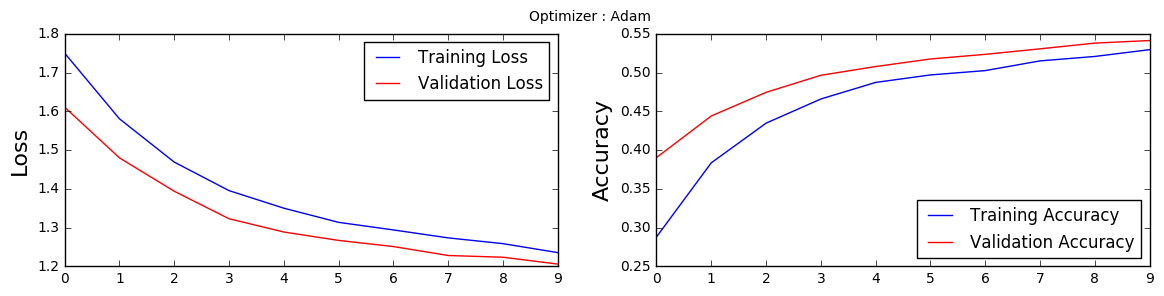

In [166]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [167]:
test = np.zeros((d.shape[0], 48*48))
for ix in range(test.shape[0]):
    t = tem[ix].split(' ')
    for iy in range(test.shape[1]):
        test[ix, iy] = int(t[iy])

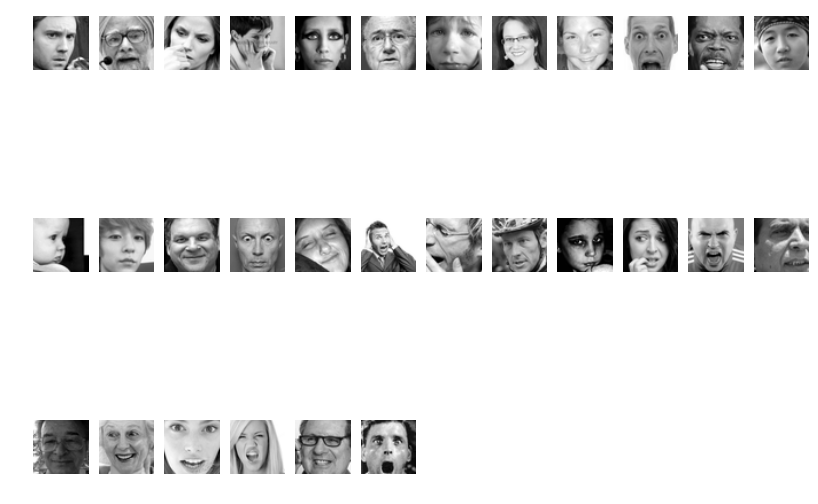

In [269]:
fig = plt.figure(figsize=(10,10))

for ix in range(30):
    plt.subplot(4,12,ix+1)
    plt.imshow(test[ix].reshape((48, 48)), cmap='gray')
    plt.axis('off')